<a href="https://colab.research.google.com/github/maha022000/MAHALAKSHMI/blob/Data-science--projects/Regression_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Regression Case Study
Load the insurance.csv dataset into a DataFrame and follow given tasks,
then build a good linear regression model.
Data files contain data for different people having different weights and
other detail, and how much they will be charged for their insurance.

1. Load the given dataset into a DataFrame
2. Find null values and drop them if it is there
3. Find an Outlier and solve it using the interquartile range (IQR) method
4. Do one-hot encoding for categorical features
5. Split data into X (independent features) and Y(dependent features)
6. Build a simple Linear Regression model and print the residual plot and
𝑅
2
score for test data(take test size as 20%)
7. Find variance inflation factor and build a new model and note the 𝑅
2
score and print summary
8. Do Ridge and Lasso regression and print 𝑅
2
score for all models.

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant, OLS

Load sample data set Given by sklearn dataset.

In [ ]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Find null values

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check information of DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using seaborn print Box-plot of dependent variable for outlier analysis.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

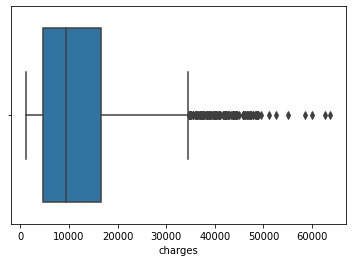

In [ ]:
#using seaborn for outlier analysis
new_df=df.copy()
sns.boxplot(new_df['charges'])

Deal with outlier using IQR method

In [ ]:
# outlier treatment using IQR method 
hp = sorted(new_df['charges'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = new_df['charges'] > lower_bound
above = new_df['charges'] < upper_bound
new_df = new_df[below & above]

In [ ]:
new_df.shape

(1199, 7)

In [ ]:
new_df.describe()


,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


Using seaborn print dist-plot on dependent variable.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

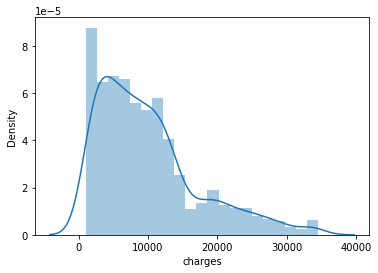

In [ ]:
#Using seaborn print dist-plot on dependent variable.
sns.distplot(new_df['charges'])

create dummy variable for One hot encoding.

In [ ]:
#creating dummy variables out of categorical variables
a=pd.get_dummies(new_df).copy()
print(a.shape)
a.head()

(1199, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Seperate dependent and independent variable into  x and y, then split into train and test

In [ ]:
#Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

In [ ]:
x = a.drop(["charges"], axis = 1).copy()
y = a["charges"].copy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=100) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(959, 11)
(240, 11)
(959,)
(240,)


Model building

In [ ]:
# Importing sklearn Library and call LinearRegression then fit on train data

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train,y_train)

pred = model.predict(x_test)


Evaluate R2 score and Adjusted R2 for model on test data.

In [ ]:
score1 = model.score(x_test,y_test) ## Co-effecient of determination (R - Square)
score1


0.6192966378869834

In [ ]:
# Adjusted R square
1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


0.6009293704166185

Print residual plot

Text(0, 0.5, 'residuals')

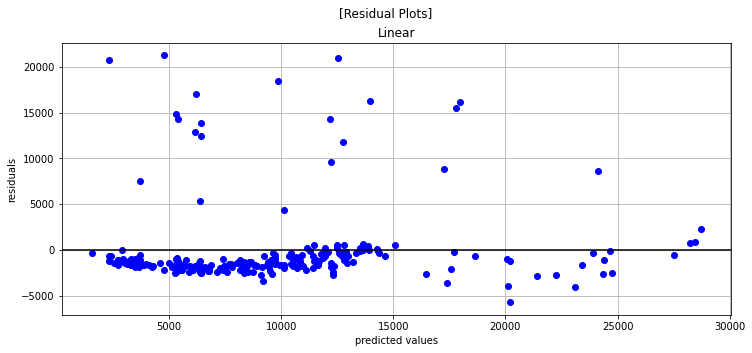

In [ ]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear')

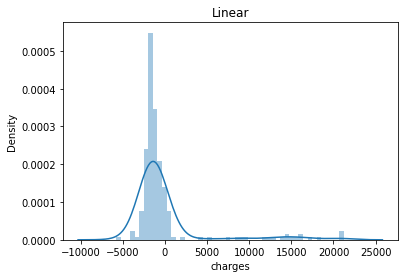

In [ ]:
import seaborn as sns

residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

<AxesSubplot:title={'center':'Model Coefficients'}>

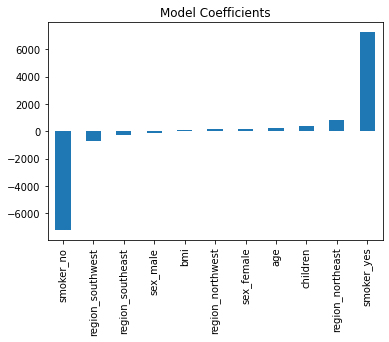

In [ ]:
# visulizing model coefficients
predictors = x_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

Finding variance inflation factor

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif["VIF"]  ### any value of VIF higher than 10 creates a problem in my model.

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


0     1.020381
1     1.167918
2     1.003027
3          inf
4          inf
5          inf
6          inf
7          inf
8          inf
9          inf
10         inf
Name: VIF, dtype: float64

Removing columns having high variance inflation factor

In [ ]:
x = add_constant(x)
tempMaxVIF = 5
maxVIF = 5
trainXCopy = x.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    if (tempMaxVIF >= maxVIF): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        print(counter)
        print(tempColumnName)
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName) # here we are making list of deleting variables 
    
    counter = counter + 1

1
region_southwest
2
smoker_yes
3
sex_male
4
const
5
bmi
6
age


/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: Runtime

In [ ]:
# now we find out that multi coliniarity kick out all the column except const because we will need it in future
# Remove all those variables which have high VIF

print(highVIFColumnNames)

highVIFColumnNames.remove('const') # We need to exclude 'const' column from getting dropped/ removed. This is the intercept.
print(highVIFColumnNames)
print(len(highVIFColumnNames))

x_new = x.drop(highVIFColumnNames, axis = 1)
print(x.shape)



['region_southwest', 'smoker_yes', 'sex_male', 'const', 'bmi', 'age']
['region_southwest', 'smoker_yes', 'sex_male', 'bmi', 'age']
5
(1199, 12)


In [ ]:
x_new # after removing some features our new independent features are

,const,children,sex_female,smoker_no,region_northeast,region_northwest,region_southeast
0,1.0,0,1,0,0,0,0
1,1.0,1,0,1,0,0,1
2,1.0,3,0,1,0,0,1
3,1.0,0,0,1,0,1,0
4,1.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...
1333,1.0,3,0,1,0,1,0
1334,1.0,0,1,1,1,0,0
1335,1.0,0,1,1,0,0,1
1336,1.0,0,1,1,0,0,0


Build OLS model, train with new data and observe R2 and Adjisted R2.

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new,y,test_size = 0.20,random_state=10)
m1ModelDef = OLS(y_train2,x_train2) # (Dep_Var, Indep_Vars) # This is model definition
m1ModelBuild = m1ModelDef.fit() # This is model building. fit() creates the linear regression equation.
m1ModelBuild.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     107.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.90e-103
Time:                        12:43:46   Log-Likelihood:                -9617.1
No. Observations:                 959   AIC:                         1.925e+04
Df Residuals:                     952   BIC:                         1.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.098e+04    674.884     31.085      0.000    1.97e+04    2.23e+04
children           534.3608    147.358      3.626      0.000     245.177     823.545
sex_female         205.3767    356.166      0.577      0.564    -493.584     904.338
smoker_no        -1.394e+04    563.985    -24.720      0.000    -1.5e+04   -1.28e+04
region_northeast  1289.8509    511.599      2.521      0.012     285.859    2293.843
region_northwest   885.8797    506.157      1.750      0.080    -107.433    1879.193
region_southeast    93.0997    506.694      0.184      0.854    -901.267    1087.466
==============================================================================
Omnibus:                      235.116   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.871
Skew:                           1.364   Prob(JB):                    6.35e-110
Kurtosis:                       5.267   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
score3 =  m1ModelBuild.rsquared
score3

0.40312380401823755

Do Ridge and Lasso regression for orignal data and observe accuracy.

Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
ridgeReg = Ridge(alpha=0.00001)
x3 = a.drop(["charges"], axis = 1).copy()
y3 = a["charges"].copy()
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.20,random_state=150) 

In [ ]:
ridgeReg.fit(x_train3,y_train3)
pred = ridgeReg.predict(x_test3)
score4 = ridgeReg.score(x_test3,y_test3)

In [ ]:
score4

0.69206068711229

In [ ]:
ridgeReg.coef_

array([  248.53710684,    48.03205304,   402.11601549,   136.42575524,
        -136.42577183, -7074.51180757,  7074.51173229,   578.94870194,
         505.70608183,  -326.27046298,  -758.38437957])

<AxesSubplot:title={'center':'Model Coefficients'}>

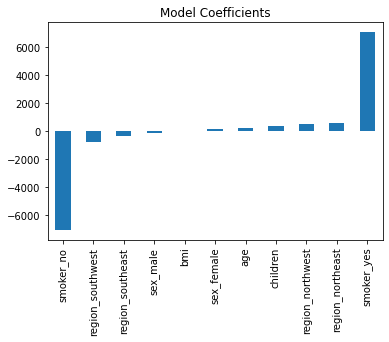

In [ ]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Final score for all models.

In [ ]:
print("all model score is:")
print("simple linear regression:          ",score1)
print("After VIF simple linear regression:",score3)
print("ridge regression:                  ",score4)
print("lasso regression:                  ",score5)


all model score is:
simple linear regression:           0.6192966378869834
After VIF simple linear regression: 0.40312380401823755
ridge regression:                   0.69206068711229
lasso regression:                   0.6920606856065208


Conclusion : we have cleaned the data using different pre-processing techniques and built linear  regression models by validating its assumptions. 

